
Supervised , Classifiaction 

Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.



**Bayes Theorem**
 
Bayes’ Theorem is a simple mathematical formula used for calculating conditional probabilities.

Conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.



![alt text](https://miro.medium.com/max/1020/1*tjcmj9cDQ-rHXAtxCu5bRQ.png)


Which tells us: how often A happens given that B happens, written P(A|B) also called **posterior probability**,

 When we know: how often B happens given that A happens, written P(B|A) , called **likelihood**
 
and how likely A is on its own, written P(A) called prior **probability** 

and how likely B is on its own, written P(B) called marginal **likelyhood** .

The fundamental Naïve Bayes assumption is that each feature makes an:

independent

equal

contribution to the outcome.


The assumptions made by Naïve Bayes are generally not correct in real-world situations. The independence assumption is never correct but often works well in practice. Hence the name ‘Naïve’.

**Examples**

we have data on 1000 pieces of fruit. The fruit being a Banana, Orange or some Other fruit and imagine we know 3 features of each fruit, whether it’s long or not, sweet or not and yellow or not, as displayed in the table below:



![alt text](https://40.media.tumblr.com/8d5f1162d1995a5231dfa950a35cd436/tumblr_inline_npfismx3mB1sleek4_540.png)


from the table what do we already know

50% of the fruits are bananas

30% are oranges

20% are other fruits

Based on our training set we can also say the following:

From 500 bananas 400 (0.8) are Long, 350 (0.7) are Sweet and 450 (0.9) are Yellow

Out of 300 oranges 0 are Long, 150 (0.5) are Sweet and 300 (1) are Yellow.

From the remaining 200 fruits, 100 (0.5) are Long, 150 (0.75) are Sweet and 50 (0.25) are Yellow.

Which should provide enough evidence to predict the class of another fruit as it’s introduced.

we’re given the features of a piece of fruit and we need to predict the class. If we’re told that the additional fruit is Long, Sweet and Yellow, we can classify it using the following formula.

![alt text](http://storage.ning.com/topology/rest/1.0/file/get/2808297821?profile=RESIZE_1024x1024)


In this case, based on the higher score 0.01875 < 0.252 we can assume this Long, Sweet and Yellow fruit is, in fact, a Banana.


**Laplace Correction** 

The value of P(Orange | Long, Sweet and Yellow) was zero in the above example, because, P(Long | Orange) was zero. That is, there were no ‘Long’ oranges in the training data.

It makes sense, but when you have a model with many features, the entire probability will become zero because one of the feature’s value was zero. To avoid this, we increase the count of the variable with zero to a small value (usually 1) in the numerator, so that the overall probability doesn’t become zero.

This correction is called ‘Laplace Correction’. Most Naive Bayes model implementations accept this or an equivalent form of correction as a parameter.

Draw circle around new data point . 
in circle we got 4 data , 3 walks and 1 Drivers.


![alt text](https://1.bp.blogspot.com/-xSiI4nZm_l4/WWJXurUrK8I/AAAAAAAAB1g/BLaQx5dgpHQbxIe0EBbEDqtk3gkqMk28gCLcBGAs/s1600/Capture6.PNG)


Here new dataset is related to walks.

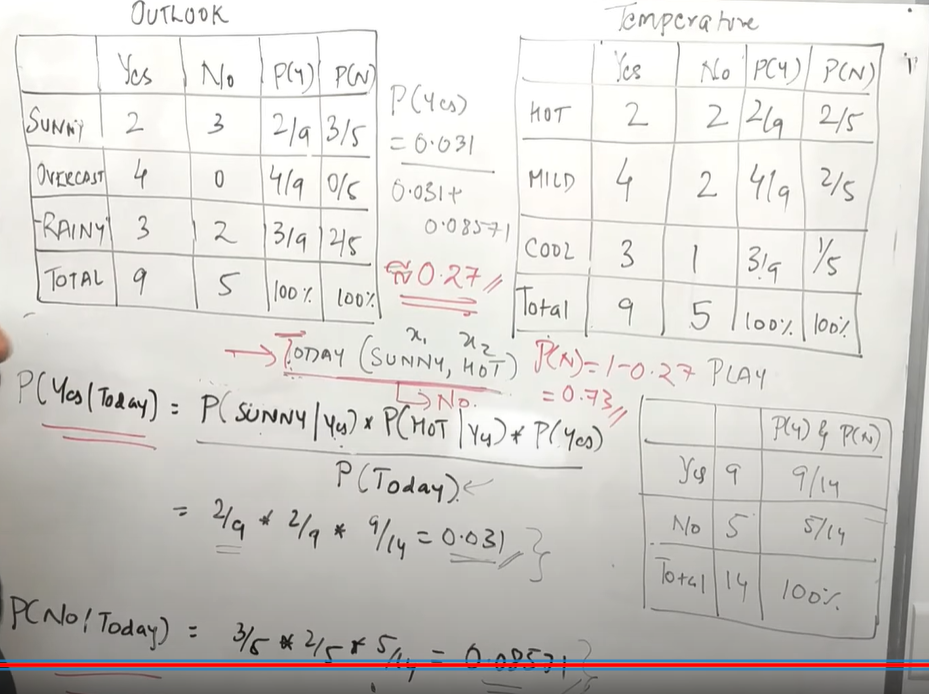

Variations of naive bayes

1. Gaussian: The Gaussian Naive Bayes algorithm assumes distribution of features to be Gaussian or normal, 

2. Multinomial: The Multinomial Naive Bayes algorithm is used when the data is distributed multinomially.this is used in 
document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

3. Bernoulli: The Bernoulli algorithm is used when the features in the data set are binary-valued. It is helpful in spam filtration and adult content detection techniques. .

In [0]:
# Naive Bayes

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/Uttam580/Machine_learning/master/datasets./Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


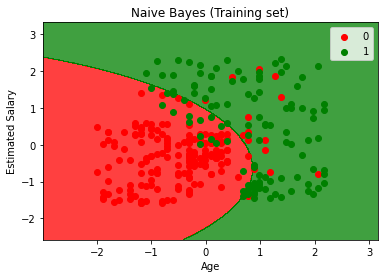

In [8]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


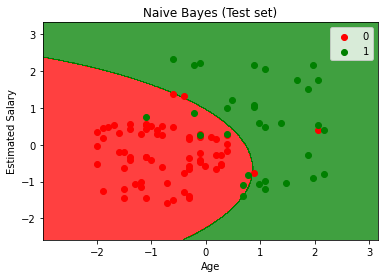

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Pros**
1. It is a relatively easy algorithm to build and understand.
2. It is faster to predict classes using this algorithm than many other    classification algorithms.
3. It can be easily trained using a small data set.

**Cons**
1. If a given class and a feature have 0 frequency, then the conditional probability estimate for that category will come out as 0. This problem is known as the “Zero Conditional Probability Problem.” This is a problem because it wipes out all the information in other probabilities too. There are several sample correction techniques to fix this problem such as “Laplacian Correction.”

2. Another disadvantage is the very strong assumption of independence class features that it makes. It is near to impossible to find such data sets in real life